In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
YEARS = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

pipeCounts = eval(open('../data/pipe_counts.txt').read())
areaKey = [
    ('Arts and Sciences', 'A&S'),
    ('Humanities', 'HUM'),
    ('Natural Sciences', 'NS'),
    ('Social Sciences', 'SS'),
]
levelKey = [
    ('Undergraduate Major and Concentrator Students', 'UC'),
    ('Graduate Students', 'GS'),
    ('Tenure Eligible Faculty', 'TE'),
    ('Tenured Faculty', 'TF'),
]
def requestTable(areaCode, levelCode):
    try:
        area = areaKey[areaCode][0]
        level = levelKey[levelCode][0]
    except (IndexOutOfBoundsError, TypeError) as e:
        print('Table could not be retrieved.')
    df = pd.DataFrame([YEARS] + pipeCounts[area][level])
    df = df.rename({0:'Year', 1: 'Women', 2: 'Men'})
    return df.T

0 0
9 1


IndexError: index 9 is out of bounds for axis 0 with size 4

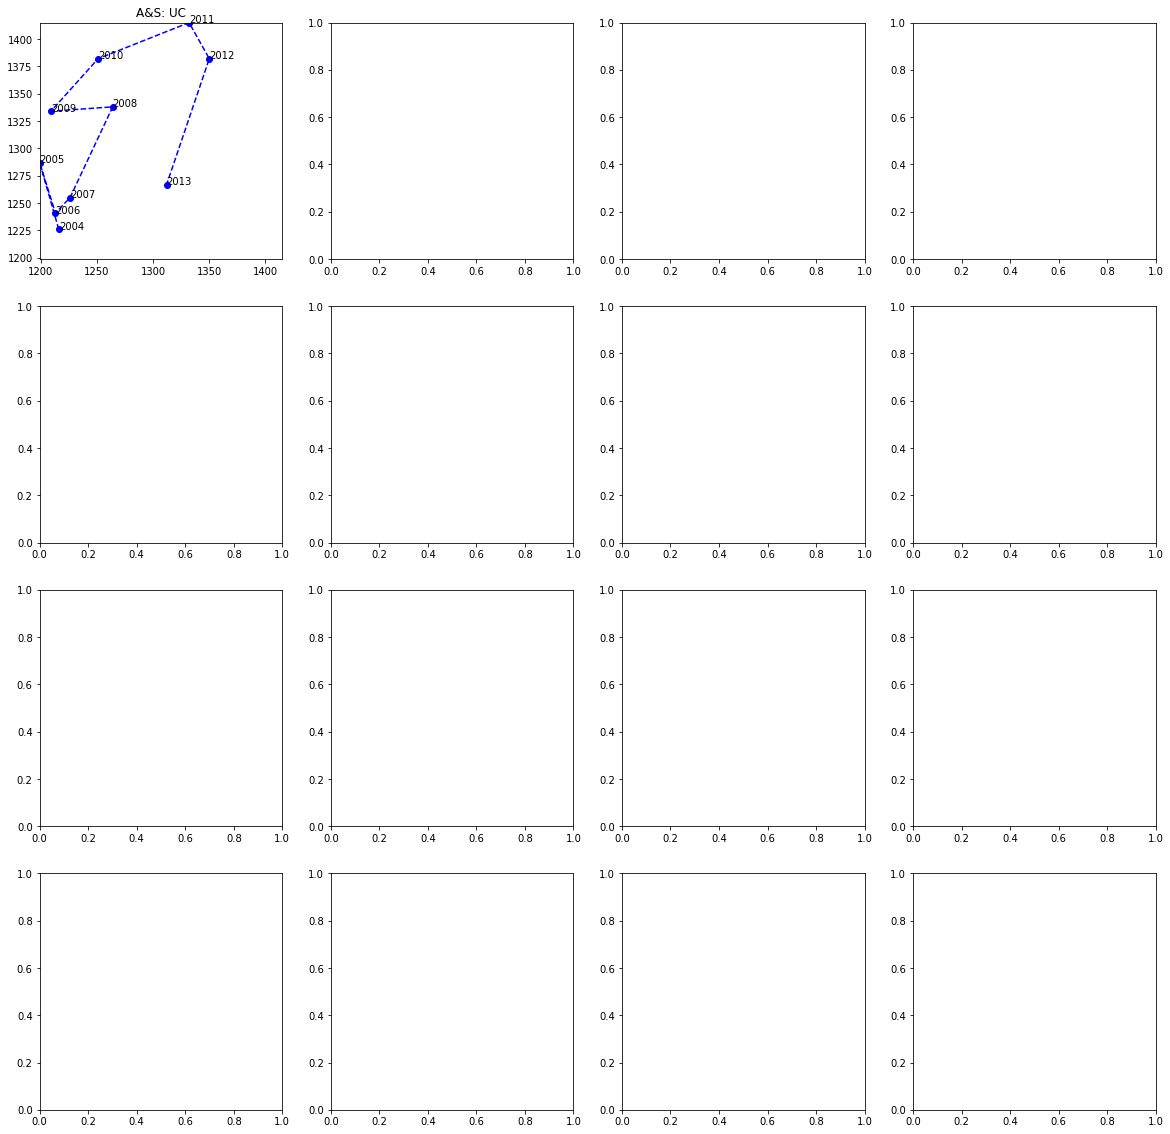

In [79]:
fig, ax_lst = plt.subplots(4,4, figsize=(20,20))

for i in range(len(areaKey)):
    for j in range(len(levelKey)):
        ax = ax_lst[i, j]
        ax.set_title('{}: {}'.format(areaKey[i][1], levelKey[j][1]))
        table = requestTable(i, j)
        ax.plot(table['Men'], table['Women'], linestyle='--', marker='o', color='b')
        axMin = min(min(table['Women']), min(table['Men']))
        axMax = max(max(table['Women']), max(table['Men']))
        ax.axis(xmin=axMin,xmax=axMax,ymin=axMin,ymax=axMax)
        
        for y in range(len(YEARS)):
            ax.annotate(table['Year'][y], (table['Men'][y], table['Women'][y]))

In [70]:
t = requestTable(0,0)
print(enumerate(t['Men']))